### Model Comparison Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import random

In [3]:
res_1 = np.random.normal(90,2,5)
res_2 = np.random.normal(80,2,5)
res_3 = np.random.normal(88,2,5)
res_4 = np.random.normal(75,4,5)

In [4]:
from scipy import stats

In [5]:
def ttest(res_1,res_2):
    stat, p_value = stats.ttest_ind(res_1, res_2)
    return p_value

In [6]:
def significance_level(p_value):
    if p_value > 0.1:
        level = None
    elif (p_value <= 0.1) and (p_value > 0.05):
        level = '.'
    elif (p_value <= 0.05) and (p_value > 0.01):
        level = '*'
    elif (p_value <= 0.01) and (p_value > 0.001):
        level = '**'
    else:
        level = '***'
    return level

In [7]:
ttest(res_1,res_2)

1.33834235308048e-05

In [8]:
significance_level(ttest(res_1,res_2))

'***'

In [9]:
results = [res_1,res_2,res_3,res_4]

In [10]:
pos = np.arange(len(results))

In [11]:
means = np.mean(results,axis=1)
stds = np.std(results,axis=1)

In [17]:
tests = {'0:1':[res_1,res_2],
        '0:2':[res_1,res_3],
        '1:3':[res_2,res_4]}


In [18]:
[int(i) for i in list(tests.keys())[0].split(':')]

[0, 1]

In [72]:
def add_bar(model_1,model_2,res_1,res_2,y,ax):
    """
    model_1,model_2 : int of the model tested
    ax : axis from matplotlib figure
    """
    ax.plot([pos[model_1],pos[model_1]],[y,y+3],'k')
    ax.plot([pos[model_1],pos[model_2]],[y+3,y+3],'k')
    ax.plot([pos[model_2],pos[model_2]],[y+3,y],'k')

    ax.text((pos[model_2]-pos[model_1])/2+pos[model_1], y+3-1, significance_level(ttest(res_1,res_2)),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict( fc="white", ec="white", pad=3)})
    return y+5

In [73]:
list(tests.values())[0]

[array([89.94178207, 87.55222416, 89.7224187 , 89.21523331, 89.24276756]),
 array([78.58540365, 78.52618586, 81.864382  , 81.62521821, 77.189308  ])]

[0, 1]
[0, 2]
[1, 3]


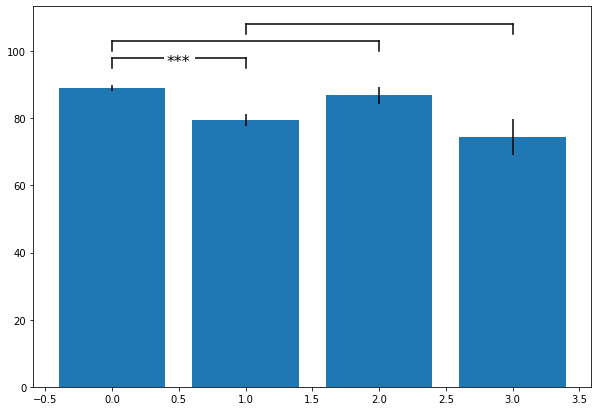

In [74]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(pos,means,yerr=stds)
y = 95
for i in range(len(list(tests.keys()))) :
    models = [int(i) for i in list(tests.keys())[i].split(':')]
    print(models)
    res_1 = list(tests.values())[i][0]
    res_2 = list(tests.values())[i][1]
    y = add_bar(models[0],models[1],res_1,res_2,y,ax=ax)

plt.savefig('test.png')